# Reflective Writing for Data Science Career Path - Codecademy
by [Charalampos Spanias](https://cspanias.github.io/aboutme/) - February 2021

## Content
1. Getting Started with Data Science
2. Python Fundamentals
3. Data Acquisition
4. [Data Manipulation with Pandas](#manipulation)
    1. [Python Lambda Functions](#lambda)
    1. [Hands-On with Pandas](#pandas)
        1. [Intro to Pandas and NumPy](#IntroPN)
        1. [Creating, Loading and Selecting Data with Pandas](#panwra)
        1. [Modifying DataFrames](#modifyingdf)
    1. [Aggregates in Pandas](#aggregates)
        1. [Calculating Column Statistics](#colstats)
        1. [Calculating Aggregate Functions](#calagg)
        1. [Pivot Tables](#pivot)
    1. [Multiple Tables in Pandas](#tables)
        1. [Inner Merge](#inner)
        1. [Merge on Specific Columns](#mergecols)
        1. [Outer Merge](#outer)
        1. [Left \& Right Merge](#leftright)
        1. [Concatenate DataFrames](#concatenate)

<a name="manipulation"></a>
# 4. Data Manipulation with Pandas

<a name="lambda"></a>
# 4.1 Python Lambda Functions

A **lambda function** is a **one-line shorthand for function**. 

A simple lambda function might look like this:

In [1]:
# define a lambda function
add_two = lambda my_input: my_input + 2

print(add_two(100))
print(add_two(2))

102
4


Function **breakdown**:
1. The function is stored in a variable called `add_two`
1. `lambda` declares that this is a lambda function (**similar to** `def`)
1. `my_input` is what we call the **input we are passing into add_two**
1. we are **returning my_input plus 2** (similar to `return` keyword)

We might want a function that will **perform differently based on different inputs**.

Let’s say that we have a function that outputs `'Got an A!'` **if a grade is at least 90**, and **otherwise** says you `'Did not get an A…'`.

We can do this using an **if statement** in our lambda function, with syntax that looks like:

**`lambda x: [OUTCOME IF TRUE] if [CONDITIONAL] else [OUTCOME IF FALSE]`**

In [2]:
check_if_A_grade = lambda my_grade: 'Got an A!' if my_grade >= 90 else 'Did not get an A...'

print(check_if_A_grade(91))
print(check_if_A_grade(70))
print(check_if_A_grade(20))

Got an A!
Did not get an A...
Did not get an A...


Lambda functions **only work if we’re just doing a one line command**, and they are great **when you need to use a function once**. 

Because you aren’t defining a function, the **reusability aspect functions is not present**. 

By saving the work of defining a function, a lambda function allows us to **efficiently run an expression and produce an output for a specific task**, such as defining a column in a table, or populating information in a dictionary.

<a name="pandas"></a>
# 4.2 Hands-On with Pandas
1. [Intro to Pandas and NumPy](#IntroPN)
1. [Creating, Loading and Selecting Data with Pandas](#panwra)
1. [Modifying DataFrames](#modifyingdf)

<a name="IntroPN"></a>
## 4.2.1 Intro to Pandas and NumPy
1. [NumPy \& NumPy Arrays](#NumPyIntro)
1. [Pandas Series \& DataFrames](#PandasIntro)

<a name="NumPyIntro"></a>
### 4.2.1.1 NumPy & NumPy Arrays

**Num**erical **Py**thon is an open-source Python library that facilitates **efficient numerical operations on large quantities of data**. 

**Pandas is built on top of NumPy**, so **NumPy is a dependency of Pandas**.

**NumPy arrays** are unique in that they are **more flexible than normal Python lists**. They are called **ndarrays** since they can have **any number (n) of dimensions (d)**. They hold a collection of items of **any one data type** and can be either **a vector (one-dimensional) or a matrix (multi-dimensional)**. 

NumPy arrays allow for **fast element access** and **efficient data manipulation**.

In [3]:
import numpy as np

# create a list
list1 = [1, 2, 3, 4]

# convert to 1D ndarray (1 row and 4 cols)
array1 = np.array(list1)
print("1D-ndarray:\n{}\n".format(array1))

# create a list of lists
list2 = [
    [1, 2, 3],
    [4, 5, 6],
]

# convert to 2D ndarray 
array2 = np.array(list2)
print("2D-ndarray:\n{}\n".format(array2))

1D-ndarray:
[1 2 3 4]

2D-ndarray:
[[1 2 3]
 [4 5 6]]



In the above output, you may notice that the NumPy array print-out is displayed in a way that **clearly demonstrates its multi-dimensional structure**: two rows and three columns.

Many operations can be performed on NumPy arrays which makes them very helpful for manipulating data:
* Selecting array elements
* Slicing arrays
* Reshaping arrays
* Splitting arrays
* Combining arrays
* Numerical operations (min, max, mean, etc)

**Mathematical operations** can be performed **on all values in a ndarray at one time**.

In [4]:
# create a np array with toy prices
toyPrices = np.array([5, 8, 3, 6])

# reduce every price by 2
print(toyPrices - 2)

[3 6 1 4]


If, however, you had stored your toy prices in a Python **list**, you would have to **manually loop through the entire list** to decrease each toy price.

In [5]:
# create a list with prices
toyPrices = [5,8,3,6]

# reduce very price by 2
for i in range(len(toyPrices)):
    toyPrices[i] -= 2

# print prices
print(toyPrices)

[3, 6, 1, 4]


<a name="PandasIntro"></a>
### 4.2.1.2 Pandas Series & DataFrames

**DataFrames** are structured like a table or spreadsheet and are at the **center of pandas**. 

The rows and the columns both have **indexes**, and you can perform operations on rows or columns separately.

A **pandas DataFrame** can be easily changed and manipulated. It has helpful functions for **handling missing data**, **performing operations on columns and rows**, **transforming data**, etc.

In addition, a lot of **SQL functions have counterparts in pandas** such as **join**, **merge**, **filter by**, and **group by**.

Just as the ndarray is the foundation of the NumPy library, the **Series** is the **core object of the pandas library**. 

A **pandas Series** is very **similar to a one-dimensional NumPy array**, but it has **additional functionality** that allows values in the Series to be **indexed using labels**. This labeling is useful when you are storing pieces of data that have **other data associated with them**.

Say you want to store the ages of students in an online course to eventually figure out the average student age. If stored in a **NumPy array**, you could only access these ages with the **internal ndarray indices 0,1,2**.... 

With a **Series** object, the indices of values are set to 0,1,2... by default, but you can **customize the indices** to be other values such as student names so an age can be accessed using a name. Customized indices of a Series are established by sending values into the Series constructor, as you will see below.

A Series holds items of **any one data type** and can be **created by sending in a scalar value, Python list, dictionary, or ndarray as a parameter to the pandas Series constructor**. 

If a **dictionary** is sent in, the **keys may be used as the indices**.

In [6]:
import pandas as pd

# create a Series using a NumPy array of ages with the default numerical indices
ages = np.array([13, 25, 19])

# covert np array to pd series
series1 = pd.Series(ages)

# print series
print(series1)

0    13
1    25
2    19
dtype: int32


When printing a Series, the **data type of its elements is also printed**. 

To customize the indices of a Series object, use the **`index`** argument of the Series constructor.

In [7]:
# create a Series using a NumPy array of ages but customize the indices to be the names that correspond to each age
ages = np.array([13,25,19])

# convert np array to pd series and customize index
series1 = pd.Series(ages,index=['Emma', 'Swetha', 'Serajh'])

# print result
print(series1)

Emma      13
Swetha    25
Serajh    19
dtype: int32


**Series objects provide more information than NumPy arrays** do. Printing a NumPy array of ages does not print the indices or allow us to customize them.

In [8]:
# create a np array
ages = np.array([13,25,19])

# print array
print(ages)

[13 25 19]


Another important type of object in the Pandas library is the **DataFrame**. 

This object is **similar in form to a matrix** as it consists of rows and columns. Both **rows and columns can be indexed** with integers or String names. 

A **DataFrame** can contain **many different data types**, but within a **column**, everything has to be the **same data type**. 

**A column of a DataFrame is essentially a Series**. All columns must have the same number of elements (rows).

There are different ways to fill a DataFrame such as with a CSV file, a SQL query, a Python list, or a dictionary.

In [9]:
# create a pd DF using list of lists and customize col names
dataf = pd.DataFrame([
    ['John Smith','123 Main St',34],
    ['Jane Doe', '456 Maple Ave',28],
    ['Joe Schmo', '789 Broadway',51]
    ],
    columns=['name','address','age'])

# show df
dataf

,name,address,age
0,John Smith,123 Main St,34
1,Jane Doe,456 Maple Ave,28
2,Joe Schmo,789 Broadway,51


The default row indices are 0,1,2..., but these can be changed. 

For example, **they can be set to be the elements in one of the columns of the DataFrame**.

In [10]:
# change index and show df
dataf.set_index('name')

,address,age
name,,
John Smith,123 Main St,34
Jane Doe,456 Maple Ave,28
Joe Schmo,789 Broadway,51


DataFrames are useful because they make it much **easier to select, manipulate, and summarize data**. 

Their **tabular format** also makes it **easier to label, simpler to read, and easier to export data to and from a spreadsheet**.

<a name="panwra"></a>
## 4.2.3 Creating, Loading and Selecting Data with Pandas
1. [Create a DataFrame](#CreateDF)
1. [Comma Seperated Values (CSV)](#CSV)
1. [Inspect a DataFrame](#InspectDF)
1. [Select Columns](#SelectCols)
1. [Select Rows](#SelectRows)
1. [Selecting Indices](#SelectIndices)

<a name="CreateDF"></a>
### 4.2.3.1 Create a DataFrame

You can pass in a dictionary to **`pd.DataFrame()`**. 

Each **key is a column name** and **each value is a list of column values**. 

The **columns must all be the same length** or you will get an error. Here’s an example:

In [11]:
import pandas as pd

# create dictionary
my_dict = {
    'name': ['John Smith', 'Jane Doe', 'Joe Schmo'],
    'address': ['123 Main St.', '456 Maple Ave.', '789 Broadway'],
    'age': [34, 28, 52],
}
print("This is a dictionary:\n\n{}\n".format(my_dict))

# convert dictionary to a pd dataframe
df = pd.DataFrame(my_dict)
print("This is a Pandas DataFrame when using print command:\n\n{}\n".format(df))
print("This is the same Pandas DataFrame as direct output:")
df

This is a dictionary:

{'name': ['John Smith', 'Jane Doe', 'Joe Schmo'], 'address': ['123 Main St.', '456 Maple Ave.', '789 Broadway'], 'age': [34, 28, 52]}

This is a Pandas DataFrame when using print command:

         name         address  age
0  John Smith    123 Main St.   34
1    Jane Doe  456 Maple Ave.   28
2   Joe Schmo    789 Broadway   52

This is the same Pandas DataFrame as direct output:


,name,address,age
0,John Smith,123 Main St.,34
1,Jane Doe,456 Maple Ave.,28
2,Joe Schmo,789 Broadway,52


Note that the **columns will appear in alphabetical order** because **dictionaries don’t have any inherent order** for columns.

You can also **add data using lists**. For example, you can pass in a **list of lists**, where **each one represents a row of data**, and use the **keyword argument** `columns` to pass a **list of column names**.

In [12]:
# create a list of lists
my_list = [
    ['John Smith', '123 Main St.', 34],
    ['Jane Doe', '456 Maple Ave.', 28],
    ['Joe Schmo','789 Broadway', 52],
]

# convert list of lists to a pd df
df = pd.DataFrame(my_list, columns=['Name', 'Address', 'Age'])
df

,Name,Address,Age
0,John Smith,123 Main St.,34
1,Jane Doe,456 Maple Ave.,28
2,Joe Schmo,789 Broadway,52


<a name="CSV"></a>
### 4.2.3.2 Comma Seperated Values (CSV)

CSV files are a **text-only spreadsheet format**.

The **first row** of a CSV contains **column headings**. All **subsequent rows contain values**. You can find an example of a CSV file [here](https://raw.githubusercontent.com/CSpanias/ml_training/master/diabetes.csv).

When you have data in a CSV, you can **load it into a DataFrame** in Pandas using **`pd.read_csv('filename.csv')`**.

You can also **save data to a CSV**, using **`df_name.to_csv('filename.csv')`**.

In [13]:
# import a CSV file as a pd df
bmi_data = pd.read_csv('https://raw.githubusercontent.com/CSpanias/ml_training/master/diabetes.csv')

# save pd df into a CSV file
bmi_data.to_csv('diabetes_data.csv')

<a name="InspectDF"></a>
### 4.2.3.3 Inspect a DataFrame

In [14]:
# inspect the first 5 rows
bmi_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
# inspect some basic info
bmi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<a name="SelectCols"></a>
### 4.2.3.4 Select Columns

There are **two possible syntaxes for selecting all values from a column**:

1. Select the column as if you were selecting **a value from a dictionary using a key**.

**`df['column_name']`**

2. If the name of a column follows all of the rules for a variable name, then you can select it using the **dot notation**.

**`df.column_name`** 

In [16]:
# select col using key
bmi_data['BMI']

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [17]:
# select using dot notation
bmi_data.BMI

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

We can also **select two or more columns** from a DataFrame by using a **list of the column names**.

Make sure to use a **double pair of square brackets**: 
1. The first for selecting the column name, e.g. `df['BMI']`
2. The second for passing a list of column names, e.g. `['BMI', 'Age', 'Insulin']`

In [18]:
# select 3 cols from df
new_df = bmi_data[ ['BMI', 'Age', 'Insulin'] ]
new_df

,BMI,Age,Insulin
0,33.6,50,0
1,26.6,31,0
2,23.3,32,0
3,28.1,21,94
4,43.1,33,168
...,...,...,...
763,32.9,63,180
764,36.8,27,0
765,26.2,30,112
766,30.1,47,0


<a name="SelectRows"></a>
### 4.2.3.5 Select Rows
1. [`df.iloc[row_index]`](#iloc)
2. [`df[df.column_name == desired_column_value]`](#logic1)
3. [`df[df.name.isin(['Martha Jones', 'Rose Tyler', 'Amy Pond'])`](#isin)

<a name="iloc"></a>
DataFrames are **zero-indexed**, meaning that we start with the **0th row and count up** from there.

For selecting a specific row we use the command **`df.iloc[row_index]`**.

In [19]:
# select the 3rd row
bmi_data.iloc[2]

Pregnancies                   8.000
Glucose                     183.000
BloodPressure                64.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          23.300
DiabetesPedigreeFunction      0.672
Age                          32.000
Outcome                       1.000
Name: 2, dtype: float64

We can also select **multiple rows** using **slicing**.

For example, the command `df.iloc[3:7]` would select all rows **starting at the 3rd row and up to but not including the 7th row**.

In [20]:
# select the first 10 rows
bmi_data.iloc[:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<a name="logic1"></a>
You can select a subset of a DataFrame by using logical statements:

**`df[df.column_name == desired_column_value]`**

In [21]:
# select all the values from BMI column that are bigger than 24
bmi_data[bmi_data.BMI > 24]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


We can also **combine multiple logical statements**, as long as **each statement is in parentheses**.

**`df[df.column_name > desired_column_value | df.column1_name < desired_column_value]`** pipe symbol (**| = Or**)

**`df[df.column_name > desired_column_value & df.column1_name < desired_column_value]`** ampersand symbol (**& = and**)

In [22]:
# select row values based on logicical operators
bmi_data[ (bmi_data.Age > 50) & (bmi_data.BMI > 24) ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
12,10,139,80,0,0,27.1,1.441,57,0
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
24,11,143,94,33,146,36.6,0.254,51,1
...,...,...,...,...,...,...,...,...,...
702,1,168,88,29,0,35.0,0.905,52,1
719,5,97,76,27,0,35.6,0.378,52,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1


<a name='isin'></a>
We can also select multiple rows using the **`isin`** command to **check that `df.column_name` is one of a list of values**:

**`df[df.column_name.isin(['value_1', 'value_2'])]`**

In [23]:
# select multiple rows based on specific values
bmi_data[bmi_data.BMI.isin([29, 33])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
23,9,119,80,35,0,29.0,0.263,29,1
65,5,99,74,27,0,29.0,0.203,32,0
158,2,88,74,19,53,29.0,0.229,22,0
218,5,85,74,22,0,29.0,1.224,32,1
733,2,106,56,27,165,29.0,0.426,22,0


<a name="SelectIndices"></a>
### 4.2.3.6 Select Indices

In [24]:
# select rows using indices
new_df = bmi_data[bmi_data.BMI > 55]
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,0,129,110,46,130,67.1,0.319,26,1
445,0,180,78,63,14,59.4,2.420,25,1
673,3,123,100,35,240,57.3,0.880,22,0


When we select a subset of a DataFrame using logic, we **end up with non-consecutive indices**. 

This is **inelegant** and makes it **hard to use `df.iloc()`**.

We can fix this using the method **`.reset_index()`**. 

If we use this command **`df.reset_index()`**, we get a **new DataFrame with a new set of indices**.

In [25]:
# reset df index 
new_df.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,177,0,129,110,46,130,67.1,0.319,26,1
1,445,0,180,78,63,14,59.4,2.420,25,1
2,673,3,123,100,35,240,57.3,0.880,22,0


Note that **the old indices have been moved into a new column called `'index'`**. 

Unless you need those values for something special, it’s probably better to use the keyword **`drop=True`** so that you don’t end up with that extra column.

In [26]:
# reset df index & drop old indices
new_df.reset_index(drop=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,129,110,46,130,67.1,0.319,26,1
1,0,180,78,63,14,59.4,2.420,25,1
2,3,123,100,35,240,57.3,0.880,22,0


Using **`.reset_index()`** will return a **new DataFrame**, but we usually just want to **modify our existing DataFrame**. 

If we use the keyword **`inplace=True`** we can just modify our existing DataFrame.

In [27]:
# select multiple rows 
new_dfA = bmi_data[bmi_data.BMI > 50]
new_dfA.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1
177,0,129,110,46,130,67.1,0.319,26,1


In [28]:
# reset index & drop old indices
new_dfA.reset_index(drop=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,162,76,56,100,53.2,0.759,25,1
1,1,88,30,42,99,55.0,0.496,26,1
2,0,129,110,46,130,67.1,0.319,26,1
3,11,135,0,0,0,52.3,0.578,40,1
4,0,165,90,33,680,52.3,0.427,23,0
5,5,115,98,0,0,52.9,0.209,28,1
6,0,180,78,63,14,59.4,2.420,25,1
7,3,123,100,35,240,57.3,0.880,22,0


In [29]:
# check if original's df indices are changed
new_dfA.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1
177,0,129,110,46,130,67.1,0.319,26,1


In [30]:
# modify indeces of current df
new_dfA.reset_index(drop=True, inplace=True)

# check if original's df incides are changed
new_dfA

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,162,76,56,100,53.2,0.759,25,1
1,1,88,30,42,99,55.0,0.496,26,1
2,0,129,110,46,130,67.1,0.319,26,1
3,11,135,0,0,0,52.3,0.578,40,1
4,0,165,90,33,680,52.3,0.427,23,0
5,5,115,98,0,0,52.9,0.209,28,1
6,0,180,78,63,14,59.4,2.420,25,1
7,3,123,100,35,240,57.3,0.880,22,0


The main distinction between **`loc`** and **`iloc`** is that:

**`loc`** is **label-based**, which means that you have to specify rows and columns based on their row and column labels.

**`iloc`** is **integer position-based**, so you have to specify rows and columns by their integer position values.

Pandas **10 minutes introduction** [here](https://pandas.pydata.org/docs/user_guide/10min.html).

<a name="modifyingdf"></a>
## 4.2.4 Modifying DataFrames
1. [Adding a Column](#addcol)
1. [Performing Column Operations](#colope)
1. [Applying Lambda to Columns and Rows](#lambdaapply)
1. [Renaming Columns](#rencol)

<a name="addcol"></a>
### 4.2.4.1 Adding a Column

In [31]:
# slice a smaller dataframe
sample_df = df.iloc[0:5]

# check sample df
sample_df.head()

,Name,Address,Age
0,John Smith,123 Main St.,34
1,Jane Doe,456 Maple Ave.,28
2,Joe Schmo,789 Broadway,52


One way that we can **add a new column** is by giving **a list of the same length** as the existing DataFrame.

In [33]:
sample_df.head()

,Name,Address,Age
0,John Smith,123 Main St.,34
1,Jane Doe,456 Maple Ave.,28
2,Joe Schmo,789 Broadway,52


In [34]:
pd.options.mode.chained_assignment = None  # hide warnings

# create list with length 5
exercise_per_week = [2, 3, 1]

# add list to df
sample_df['Exercise per Week'] = exercise_per_week

# check df
sample_df.head()

,Name,Address,Age,Exercise per Week
0,John Smith,123 Main St.,34,2
1,Jane Doe,456 Maple Ave.,28,3
2,Joe Schmo,789 Broadway,52,1


We can also add a **new column that is the same for all rows** in the DataFrame.

In [35]:
# add a column with the same value for all rows
sample_df['Heart Problems'] = 'None'

# check df
sample_df

,Name,Address,Age,Exercise per Week,Heart Problems
0,John Smith,123 Main St.,34,2,None
1,Jane Doe,456 Maple Ave.,28,3,None
2,Joe Schmo,789 Broadway,52,1,None


Finally, you can add **a new column by performing a function on the existing columns**.

In [37]:
# create list of lists
bmi_data = [
    ['Mike', 1.80, 80.0],
    ['Maria', 1.65, 60.0],
]

# convert to df
bmi_df = pd.DataFrame(bmi_data, 
                      columns=['Name', 'Height(m)', 'Weight(kg)'])

# check df
bmi_df

,Name,Height(m),Weight(kg)
0,Mike,1.80,80.0
1,Maria,1.65,60.0


In [38]:
# calculate and add BMI column to 2 decimal places
bmi_df['BMI'] = round(bmi_df['Weight(kg)'] / (bmi_df['Height(m)']**2), 2)

# check df
bmi_df

,Name,Height(m),Weight(kg),BMI
0,Mike,1.80,80.0,24.69
1,Maria,1.65,60.0,22.04


<a name="colope"></a>
### 4.2.4.2 Performing Column Operations

We can use the **`apply()`** function to **apply a function to every value in a particular column**.

In [39]:
# createa df
df = pd.DataFrame([
  ['JOHN SMITH', 'john.smith@gmail.com'],
  ['Jane Doe', 'jdoe@yahoo.com'],
  ['joe schmo', 'joeschmo@hotmail.com']
],
columns=['Name', 'Email'])

# make every name title-case
df['Name'] = df['Name'].apply(str.title)

# check df
df

,Name,Email
0,John Smith,john.smith@gmail.com
1,Jane Doe,jdoe@yahoo.com
2,Joe Schmo,joeschmo@hotmail.com


<a name="lamdaapply"></a>
### 4.2.4.3 Applying Lambda to Columns and Rows.

We can **apply a lambda function** to a column.

In [40]:
# create dict
email_dict = {
    'Name': ['JOHN SMITH', 'Jane Doe', 'joe schmo'],
    'Email Address': ['john.smith@gmail.com', 'jdoe@yahoo.com', 'joeschmo@hotmail.com'],
}

# convert to df
email_df = pd.DataFrame(email_dict)

# check df
email_df

,Name,Email Address
0,JOHN SMITH,john.smith@gmail.com
1,Jane Doe,jdoe@yahoo.com
2,joe schmo,joeschmo@hotmail.com


In [41]:
# create col with email provider
email_df['Email Provider'] = email_df['Email Address'].apply(lambda x: x.split('@')[-1])

# check df
email_df

,Name,Email Address,Email Provider
0,JOHN SMITH,john.smith@gmail.com,gmail.com
1,Jane Doe,jdoe@yahoo.com,yahoo.com
2,joe schmo,joeschmo@hotmail.com,hotmail.com


We can also operate on **multiple columns at once**. 

If we use apply without specifying a single column and add the **argument `axis=1`**, the input to our lambda function will be an entire row, not a column. 

To **access particular values of the row**, we use the syntax **`row.column_name`** or **`row[‘column_name’]`**.

In [42]:
# check df
bmi_df

,Name,Height(m),Weight(kg),BMI
0,Mike,1.80,80.0,24.69
1,Maria,1.65,60.0,22.04


In [43]:
# add col
bmi_df['Health Risk'] = bmi_df.apply(lambda row: 'Moderate' if row['BMI'] > 24  else 'Low', axis=1)

# check df
bmi_df

,Name,Height(m),Weight(kg),BMI,Health Risk
0,Mike,1.80,80.0,24.69,Moderate
1,Maria,1.65,60.0,22.04,Low


<a name="rencol"></a>
### 4.2.4.4 Renaming Columns

When we get our data from other sources, we often want to **change the column names**. For example, we might want all of the **column names to follow variable name rules**, so that we can use **`df.column_name`** (which **tab-completes**) rather than **`df['column_name']`** (which **takes up extra space**).

You can **change all of the column names at once** by setting the **`.columns`** property to a different list. This command **edits the existing DataFrame**.

In [44]:
# create df
df = pd.DataFrame({
    'name': ['John', 'Jane', 'Sue', 'Fred'],
    'age': [23, 29, 21, 18]
})

# check df
df

,name,age
0,John,23
1,Jane,29
2,Sue,21
3,Fred,18


In [45]:
# rename columns
df.columns = ['First Name', 'Age']

# check df
df

,First Name,Age
0,John,23
1,Jane,29
2,Sue,21
3,Fred,18


You also can **rename individual columns** by using the **`.rename`** method. 

Pass a **dictionary** like the one below to the columns keyword argument:

**`df.rename(columns = {'old_column_name1': 'new_column_name1', 'old_column_name2': 'new_column_name2'}, inplace=True)`**

In [46]:
# rename df
df.rename(columns={
    'Age': 'age',
    'First Name': 'fist name',
}, inplace=True)

# check df
df

,fist name,age
0,John,23
1,Jane,29
2,Sue,21
3,Fred,18


There are several reasons why **`.rename` is preferable to `.columns`**:
1. You can rename just one column
1. You can be specific about which column names are getting changed (with `.column` you can accidentally switch column names if you’re not careful)

**Note**: If you **misspell** one of the original column names, this **command won’t fail**. It just won’t change anything.

<a name="aggregates"></a>
# 4.3 Aggregates in Pandas
1. [Calculating Column Statistics](#colstats)
1. [Calculating Aggregate Functions](#calagg)
1. [Pivot Tables](#pivot)

An **aggregate statistic** is a way of creating a **single number that describes a group of numbers**, such as the **mean**, **median**, and **standard deviation**.

<a name="colstats"></a>
## 4.3.2 Calculating Column Statistics

The general syntax for aggregates is: **`df.column_name.command()`**.

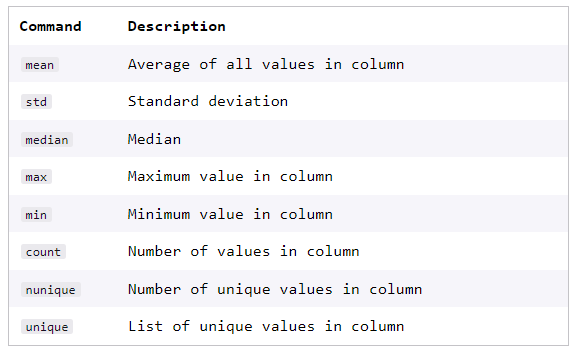

<a name="calagg"></a>
## 4.3.3 Calculating Aggregate Functions

When we have a bunch of data, we often want to **calculate aggregate statistics over certain subsets of the data**.

**`df.groupby('column1').column2.measurement()`**

**Breakdown**:
* **`column1`** the column that we want to group by
* **`column2`** the column that we want to perform a measurement on
* **`measurement`** is the measurement function we want to apply

In [52]:
# show df
new_dfA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,162,76,56,100,53.2,0.759,25,1
1,1,88,30,42,99,55.0,0.496,26,1
2,0,129,110,46,130,67.1,0.319,26,1
3,11,135,0,0,0,52.3,0.578,40,1
4,0,165,90,33,680,52.3,0.427,23,0


In [54]:
# calculate max BMI
print("The maximum value for BMI is: {}.\n".format(new_dfA.BMI.max()))

# calculate max BMI for age > 40
print("The maximum value for BMI for people grouped by age is: {}.\n".format(new_dfA.groupby('Age').BMI.max()[:5]))

# check type
print("The data type of the groupby result is: {}.".format(type(new_dfA.groupby('Age').BMI.max())))

The maximum value for BMI is: 67.1.

The maximum value for BMI for people grouped by age is: Age
22    57.3
23    52.3
25    59.4
26    67.1
28    52.9
Name: BMI, dtype: float64.

The data type of the groupby result is: <class 'pandas.core.series.Series'>.


The **`groupby`** function **creates a new Series, not a DataFrame**. Usually, we’d prefer that **indices were actually a column**. In order to get that, we can use **`reset_index()`**. 

This will **transform our Series into a DataFrame** and move the indices into their own column. Generally, you’ll **always see a groupby statement followed by reset_index**:

**`df.groupby('column1').column2.measurement().reset_index()`**

In addition, when we use **`groupby`**, we often want to **rename the column we get** as a result.

In [55]:
# calculate 'BMI' based on 'Outcome' & reset index
bmi_outcome = new_dfA.groupby('Outcome').BMI.mean().reset_index()

# rename BMI col
bmi_outcome.rename(columns={'BMI': 'Mean BMI'}, inplace=True)

# show df
bmi_outcome

,Outcome,Mean BMI
0,0,54.80
1,1,56.65


In [56]:
# calculate number of subjects based on pregnancies
outcome_pregnancies = new_dfA.groupby('Outcome').Pregnancies.count().reset_index()

# rename col
outcome_pregnancies.rename(columns={'Pregnancies': 'Pregnancies Counts'}, inplace=True)

# show df
outcome_pregnancies

,Outcome,Pregnancies Counts
0,0,2
1,1,6


Sometimes, the operation that you want to perform is **more complicated than mean or count**. 

In those cases, you can use the **`apply`** method and **lambda functions**, just like we did for individual column operations. Note that **the input to our lambda function will always be a list of values**.

A great example of this is **calculating percentiles**.

In [57]:
# calculate the 90th percentile for BMI based on age
bmi_age_perce = new_dfA.groupby('Age').BMI.apply(lambda x: np.percentile(x, 90)).reset_index()[:5]

# rename col 
bmi_age_perce.rename(columns={'BMI': 'BMI 90th Percentile'}, inplace=True)

# show df
bmi_age_perce

,Age,BMI 90th Percentile
0,22,57.30
1,23,52.30
2,25,58.78
3,26,65.89
4,28,52.90


Sometimes, we want to **group by more than one column**. We can easily do this by **passing a list of column names into the `groupby` method**.

In [58]:
# calculate mean BMI based on 'Age' & 'Pregnancies'
bmi_age_pregn = new_dfA.groupby(['Age', 'Pregnancies']).BMI.mean().reset_index()

# rename col
bmi_age_pregn.rename(columns={'BMI': 'Mean BMI'}, inplace=True)

# show df
bmi_age_pregn

,Age,Pregnancies,Mean BMI
0,22,3,57.3
1,23,0,52.3
2,25,0,56.3
3,26,0,67.1
4,26,1,55.0
5,28,5,52.9
6,40,11,52.3


<a name="pivot"></a>
## 4.3.4 Pivot Tables

When we perform a **`groupby` across multiple columns**, we often want to **change how our data is stored**, so it **easier to spot patterns**.

Reorganizing a table in this way is called **pivoting**. The new table is called a **pivot table**.

**`df.pivot(columns='ColumnToPivot', index='ColumnToBeRows', values='ColumnToBeValues')`**

In [59]:
# create pivot table
bmi_age_pregn_pivot = bmi_age_pregn.pivot(columns='Pregnancies', index='Age', values='Mean BMI').reset_index()

# show pivot table
bmi_age_pregn_pivot[:5]

Pregnancies,Age,0,1,3,5,11
0,22,NaN,NaN,57.3,NaN,NaN
1,23,52.3,NaN,NaN,NaN,NaN
2,25,56.3,NaN,NaN,NaN,NaN
3,26,67.1,55.0,NaN,NaN,NaN
4,28,NaN,NaN,NaN,52.9,NaN


**Reshaping & Pivot Tables** [official documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html).

**`~`** NOT operator

In [61]:
~new_dfA.BMI.isnull()

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
Name: BMI, dtype: bool

<a name="tables"></a>
# 4.4 Multiple Tables in Pandas
1. [Inner Merge](#inner)
1. [Merge on Specific Columns](#mergecols)
1. [Outer Merge](#outer)
1. [Left \& Right Merge](#leftright)
1. [Concatenate DataFrames](#concatenate)

In order to efficiently store data, we often **spread related information across multiple tables**.

For example, we could have one table with all of the following information:

* `order_id`
* `customer_id`
* `customer_name`
* `customer_address`
* `customer_phone_number`
* `product_id`
* `product_description`
* `product_price`
* `quantity`
* `timestamp`

However, a lot of this information would be **repeated**. 

If the **same customer makes multiple orders**, that customer’s name, address, and phone number will be reported multiple times. 

If the **same product is ordered by multiple customers**, then the product price and description will be repeated. This will make our orders table big and unmanageable.

So instead, we can **split our data** into three tables:

* `orders` would contain the information necessary to describe an order: `order_id`, `customer_id`, `product_id`, `quantity`, and `timestamp`

* `products` would contain the information to describe each product: `product_id`, `product_description` and `product_price`

* `customers` would contain the information for each customer: `customer_id`, `customer_name`, `customer_address`, and `customer_phone_number`

<a name="inner"></a>
## 4.4.1 Inner Merge

In [63]:
orders = pd.read_csv('orders.txt')
orders

,id,product_id,customer_id,quantity,timestamp
0,1,3,2,1,2017-01-01
1,2,2,2,3,2017-01-01
2,3,1,3,1,2017-01-01
3,4,2,3,2,2016-02-01
4,5,3,3,3,2017-02-01
5,6,4,1,2,2017-03-01
6,7,1,1,1,2017-02-02
7,8,4,1,1,2017-02-02


If we just look at the orders table, we can’t really tell what’s happened in each order. 

However, if we **refer to the other tables**, we can get a more complete picture.

Doing this kind of matching is called **merging two DataFrames**.

In [64]:
products = pd.read_csv('products.txt')
products

,id,description,price
0,1,thing-a-ma-jig,5
1,2,whatcha-ma-call-it,10
2,3,doo-hickey,7
3,4,gizmo,3


It is easy to do this kind of matching for one row, but **hard to do it for multiple rows**.

**`new_df = pd.merge(table_1, table_2)`** 

Looks for **columns that are common** between two DataFrames and then looks for **rows where those column’s values are the same**. 

It then combines the matching rows into a single row in a new table.

In [65]:
sales = pd.read_csv('sales.txt')
sales

,month,revenue
0,January,300
1,February,290
2,March,310
3,April,325
4,May,475
5,June,495


In [66]:
targets = pd.read_csv('targets.txt')
targets

,month,target
0,January,310
1,February,270
2,March,300
3,April,350
4,May,475
5,June,500


In [67]:
pd.merge(sales, targets)

,month,revenue,target
0,January,300,310
1,February,290,270
2,March,310,300
3,April,325,350
4,May,475,475
5,June,495,500


Each DataFrame has also its own merge method, which produces the same result as above.

**`new_df = table_1.merge(table_2)`**

We generally use this when we are **joining more than two DataFrames together because we can “chain” the commands**. The following command would merge orders to customers, and then the resulting DataFrame to products:

**`new_df = table_1.merge(table_2).merge(table_3)`**

In [68]:
men_women_sales = pd.read_csv('men_women.txt')
sales.merge(targets).merge(men_women_sales)

,month,revenue,target,men,women
0,January,300,310,30,35
1,February,290,270,29,35
2,March,310,300,31,29
3,April,325,350,32,28
4,May,475,475,47,50
5,June,495,500,49,45


<a name="mergecols"></a>
## 4.4.2 Merge on Specific Columns

Tables **won’t always have a common column** when we want to perform a merge.

Generally, the products and customers DataFrames would not have the columns `order_id` or `product_id`. 

Instead, they would both be called `id` and it would be implied that the `id` was the `order_id` for the orders table and `product_id` for the products table.

In [69]:
orders

,id,product_id,customer_id,quantity,timestamp
0,1,3,2,1,2017-01-01
1,2,2,2,3,2017-01-01
2,3,1,3,1,2017-01-01
3,4,2,3,2,2016-02-01
4,5,3,3,3,2017-02-01
5,6,4,1,2,2017-03-01
6,7,1,1,1,2017-02-02
7,8,4,1,1,2017-02-02


In [70]:
products

,id,description,price
0,1,thing-a-ma-jig,5
1,2,whatcha-ma-call-it,10
2,3,doo-hickey,7
3,4,gizmo,3


Because the `id` columns would mean something different in each table, our default merges would be wrong.

One way that we could address this problem is to **rename the columns** for our merges. 

In [71]:
pd.merge(orders, products.rename(columns={'id': 'product_id'}))

,id,product_id,customer_id,quantity,timestamp,description,price
0,1,3,2,1,2017-01-01,doo-hickey,7
1,5,3,3,3,2017-02-01,doo-hickey,7
2,2,2,2,3,2017-01-01,whatcha-ma-call-it,10
3,4,2,3,2,2016-02-01,whatcha-ma-call-it,10
4,3,1,3,1,2017-01-01,thing-a-ma-jig,5
5,7,1,1,1,2017-02-02,thing-a-ma-jig,5
6,6,4,1,2,2017-03-01,gizmo,3
7,8,4,1,1,2017-02-02,gizmo,3


We could also use the keywords `left_on` and `right_on` to specify which columns we want to perform the merge on. 

In [72]:
pd.merge(orders, products, left_on='product_id', right_on='id')

,id_x,product_id,customer_id,quantity,timestamp,id_y,description,price
0,1,3,2,1,2017-01-01,3,doo-hickey,7
1,5,3,3,3,2017-02-01,3,doo-hickey,7
2,2,2,2,3,2017-01-01,2,whatcha-ma-call-it,10
3,4,2,3,2,2016-02-01,2,whatcha-ma-call-it,10
4,3,1,3,1,2017-01-01,1,thing-a-ma-jig,5
5,7,1,1,1,2017-02-02,1,thing-a-ma-jig,5
6,6,4,1,2,2017-03-01,4,gizmo,3
7,8,4,1,1,2017-02-02,4,gizmo,3


In the example above, the **“left” table** is the one that comes first (orders), and the **“right” table** is the one that comes second (products). 

This syntax says that we should match the **`products_id` from `orders` to the `id` in `products`**.
    
Notice that we **ended up with two columns called `id`**, one from the first table and one from the second. Pandas won’t let you have two columns with the same name, so it will change them to `id_x` and `id_y`.

The new column names `id_x` and `id_y` aren’t very helpful for us when we read the table. We can help make them more useful by using the **keyword suffixes**.

In [73]:
pd.merge(orders, products, left_on='product_id', right_on='id', suffixes=['_order', '_product'])

,id_order,product_id,customer_id,quantity,timestamp,id_product,description,price
0,1,3,2,1,2017-01-01,3,doo-hickey,7
1,5,3,3,3,2017-02-01,3,doo-hickey,7
2,2,2,2,3,2017-01-01,2,whatcha-ma-call-it,10
3,4,2,3,2,2016-02-01,2,whatcha-ma-call-it,10
4,3,1,3,1,2017-01-01,1,thing-a-ma-jig,5
5,7,1,1,1,2017-02-02,1,thing-a-ma-jig,5
6,6,4,1,2,2017-03-01,4,gizmo,3
7,8,4,1,1,2017-02-02,4,gizmo,3


<a name="outer"></a>
## 4.4.3 Outer Merge

When we merge two DataFrames whose rows don’t match perfectly, __we lose the unmatched rows__. There are other types of merges that we can use when we want to __keep information from the unmatched rows__.

If we wanted to combine the data without losing the customers who are missing from one of the tables, we could use an __Outer Join__. An Outer Join would include __all rows from both tables__, even if they don’t match. Any __missing values are filled in with None or nan__.

In [88]:
store_A = pd.read_csv('store_A.txt')
store_A

,item,store_a_inventory
0,hammer,12
1,screwdriver,15
2,nails,200
3,screws,350
4,saw,6
5,duct tape,150
6,wrench,12
7,pvc pipe,54


In [89]:
store_B = pd.read_csv('store_B.txt')
store_B

,item,store_b_inventory
0,hammer,6
1,nails,250
2,saw,6
3,duct tape,150
4,pvc pipe,54
5,rake,10
6,shovel,15
7,wooden dowels,192


In [90]:
pd.merge(store_A, store_B, how='outer')

,item,store_a_inventory,store_b_inventory
0,hammer,12.0,6.0
1,screwdriver,15.0,NaN
2,nails,200.0,250.0
3,screws,350.0,NaN
4,saw,6.0,6.0
5,duct tape,150.0,150.0
6,wrench,12.0,NaN
7,pvc pipe,54.0,54.0
8,rake,NaN,10.0
9,shovel,NaN,15.0


<a name="leftright"></a>
## 4.4.4 Left & Right Merge

Support that `store_A` wants to find out what products they carry that `Store_B` does not carry.

We could get this by performing a __Left Merge__. A Left Merge includes __all rows from the first (left) table__, but only __rows from the second (right) table that match the first table__.

In [91]:
pd.merge(store_A, store_B, how='left')

,item,store_a_inventory,store_b_inventory
0,hammer,12,6.0
1,screwdriver,15,NaN
2,nails,200,250.0
3,screws,350,NaN
4,saw,6,6.0
5,duct tape,150,150.0
6,wrench,12,NaN
7,pvc pipe,54,54.0


__Right merge__ is the exact opposite of left merge. Here, the merged table will include __all rows from the second (right) table__, but only __rows from the first (left) table that match the second table__.

Support that `Store_A` wants to find out what products `Store_B` carry that it does not carry itself.

In [93]:
pd.merge(store_A, store_B, how='right')

,item,store_a_inventory,store_b_inventory
0,hammer,12.0,6
1,nails,200.0,250
2,saw,6.0,6
3,duct tape,150.0,150
4,pvc pipe,54.0,54
5,rake,NaN,10
6,shovel,NaN,15
7,wooden dowels,NaN,192


<a name="concatenate"></a>
## 4.4.5 Concatenate DataFrames

When we need to __reconstruct a single DataFrame from multiple smaller DataFrames__, we can use the method __`pd.concat([df1, df2, df3, ...])`__. This method only works if __all of the columns are the same in all of the DataFrames__.

In [95]:
bakery = pd.read_csv('bakery.txt')
bakery

,item,price
0,cookie,2.50
1,brownie,3.50
2,slice of cake,4.75
3,slice of cheesecake,4.75
4,slice of pie,5.00


In [96]:
ice_cream = pd.read_csv('ice_cream.txt')
ice_cream

,item,price
0,scoop of chocolate ice cream,3.00
1,scoop of vanilla ice cream,2.95
2,scoop of strawberry ice cream,3.05
3,scoop of cookie dough ice cream,3.25


In [99]:
pd.concat([bakery, ice_cream]).reset_index(drop=True)

,item,price
0,cookie,2.50
1,brownie,3.50
2,slice of cake,4.75
3,slice of cheesecake,4.75
4,slice of pie,5.00
5,scoop of chocolate ice cream,3.00
6,scoop of vanilla ice cream,2.95
7,scoop of strawberry ice cream,3.05
8,scoop of cookie dough ice cream,3.25
